<a href="https://colab.research.google.com/github/akanksdario/Fetal-Health-Status/blob/main/fetal_health_status_prediction_with_Exploratory_Data_Anaysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# # **Antenatal Care Prediction System**
## AKANKUNDA DARIUS 2018/BCS/034/PS

# Fetal Health status Prediction using a variety of classification Models 

***

## Fetal Health Prediction 
Classify fetal health in order to prevent child and maternal mortality(antenatal Care) 

Given *data about fetuses*, I predicted the **health status:** of a given fetus.

I used a variety of classification models to make  predictions.

# Background
Reduction of child mortality is reflected in several of the United Nations' Sustainable Development Goals and is a key indicator of human progress.
The UN expects that by 2030, countries end preventable deaths of newborns and children under 5 years of age, with all countries aiming to reduce under‑5 mortality to at least as low as 25 per 1,000 live births.

Parallel to notion of child mortality is of course maternal mortality, which accounts for 295 000 deaths during and following pregnancy and childbirth (as of 2017). The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented.

In light of what was mentioned above, Cardiotocograms (CTGs) are a simple and cost accessible option to assess fetal health, allowing healthcare professionals to take action in order to prevent child and maternal mortality. The equipment itself works by sending ultrasound pulses and reading its response, thus shedding light on fetal heart rate (FHR), fetal movements, uterine contractions and more.

#Dataset
The dataset used contains 2126 records of features extracted from Cardiotocogram exams, which were then classified by three expert obstetritians into 3 classes:

Normal

Suspect

Pathological

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

Saving fetal_healthd.csv to fetal_healthd.csv


In [4]:
import io
data = pd.read_csv(io.BytesIO(uploaded['fetal_healthd.csv']))

In [5]:
data

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.000,0.000,0.000,0.0,0.0,73,0.5,43,2.4,64,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.000,0.006,0.003,0.0,0.0,17,2.1,0,10.4,130,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.000,0.008,0.003,0.0,0.0,16,2.1,0,13.4,130,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.000,0.008,0.003,0.0,0.0,16,2.4,0,23.0,117,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.000,0.008,0.000,0.0,0.0,16,2.4,0,19.9,117,53,170,9,0,137,136,138,11,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140,0.000,0.000,0.007,0.000,0.0,0.0,79,0.2,25,7.2,40,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.000,0.0,0.0,78,0.4,22,7.1,66,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.000,0.0,0.0,79,0.4,20,6.1,67,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.000,0.0,0.0,78,0.4,27,7.0,66,103,169,6,0,152,147,151,4,1,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   int64  
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   int64  
 8   mean_value_of_short_term_variability  

# Exploratory Data Analysis

In [7]:
eda_df = data.copy()

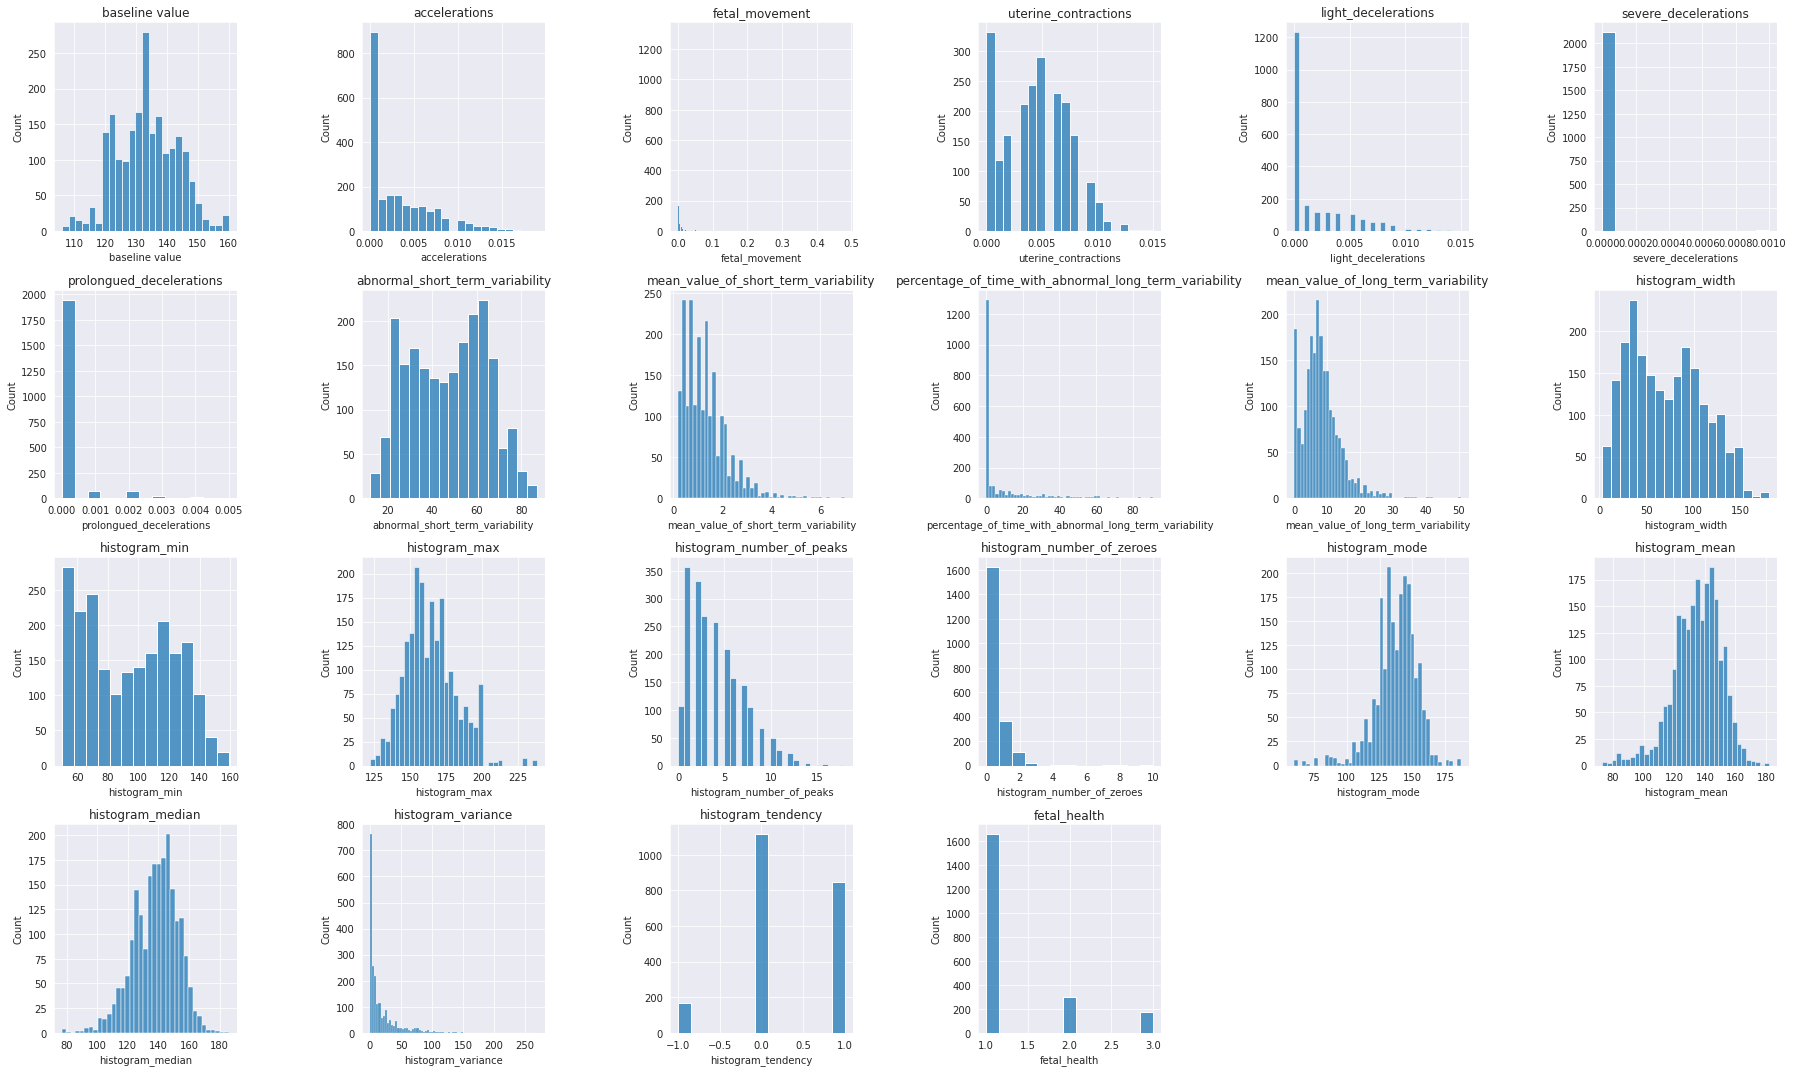

In [8]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.histplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

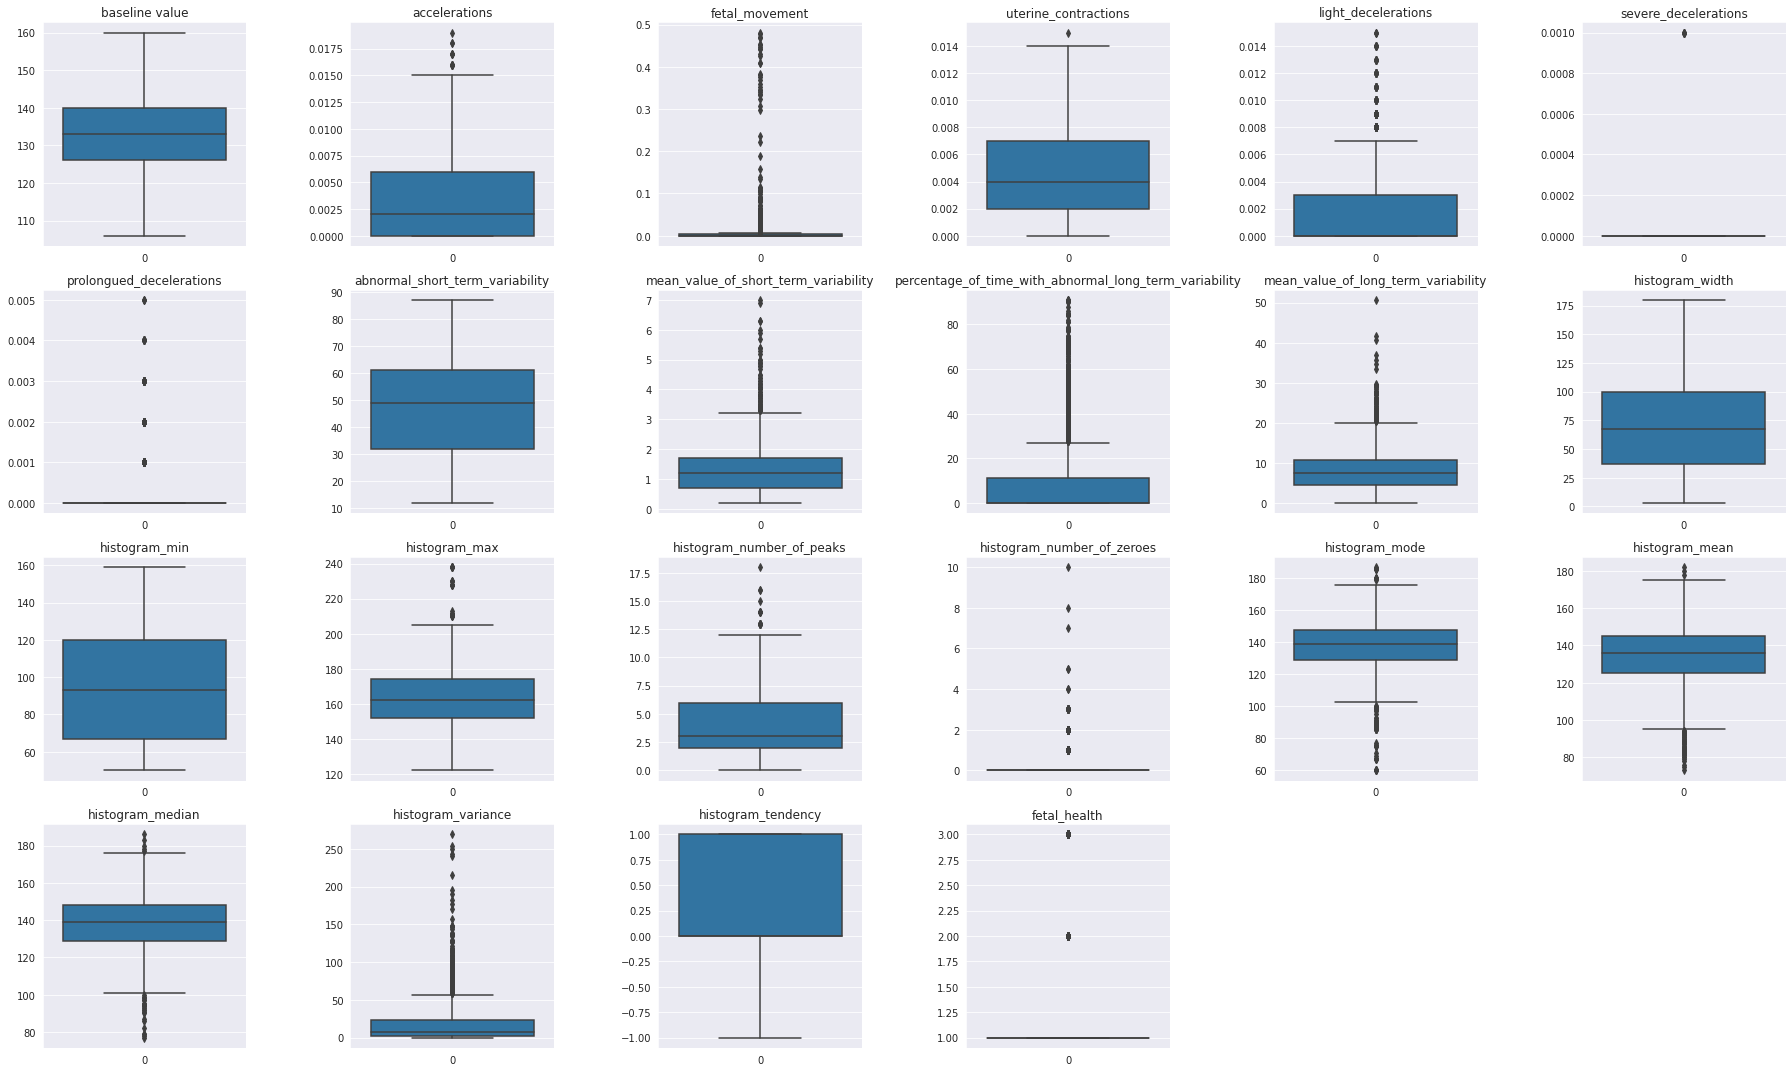

In [9]:
plt.figure(figsize=(25, 15))

for i, column in enumerate(eda_df.columns):
    plt.subplot(4, 6, i + 1)
    sns.boxplot(data=eda_df[column])
    plt.title(column)

plt.tight_layout()
plt.show()

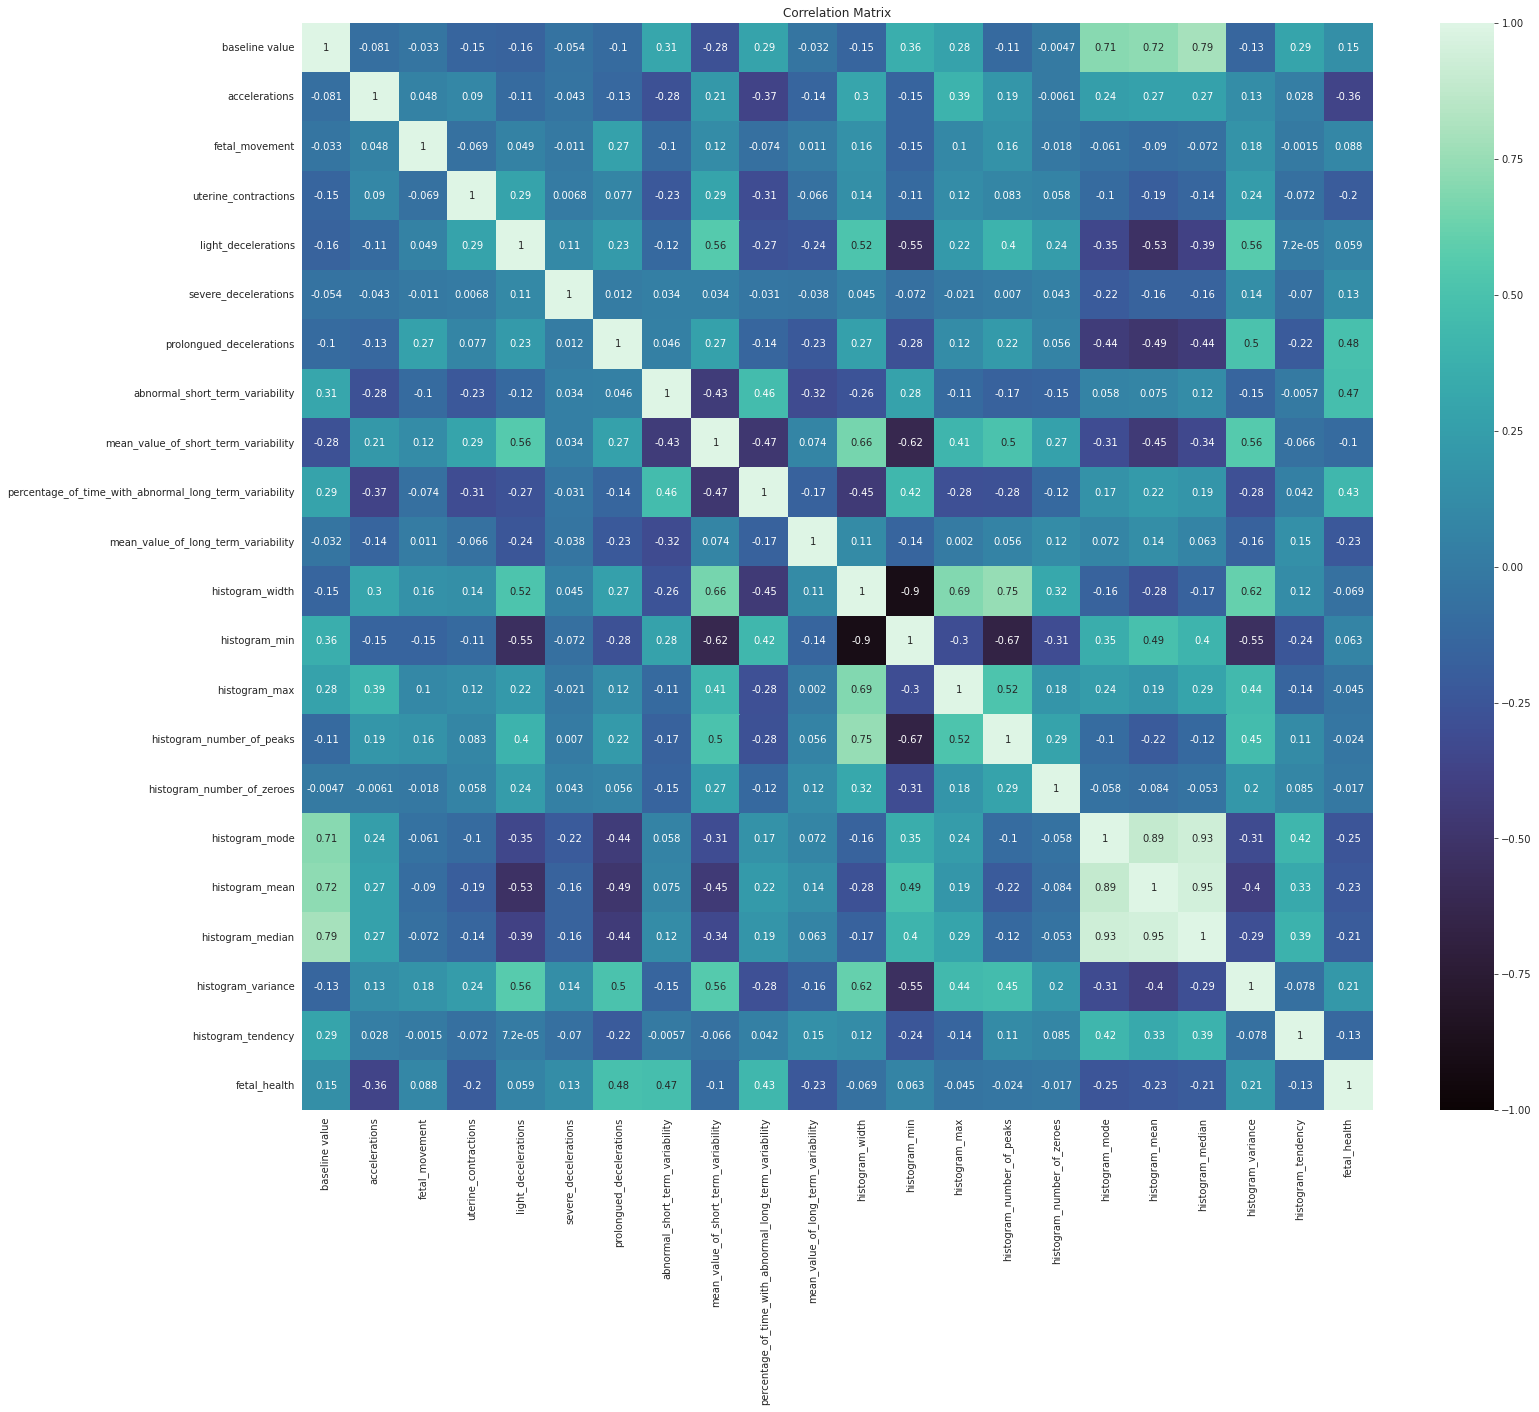

In [10]:
corr = eda_df.corr()

plt.figure(figsize=(24, 20))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.title("Correlation Matrix")
plt.show()

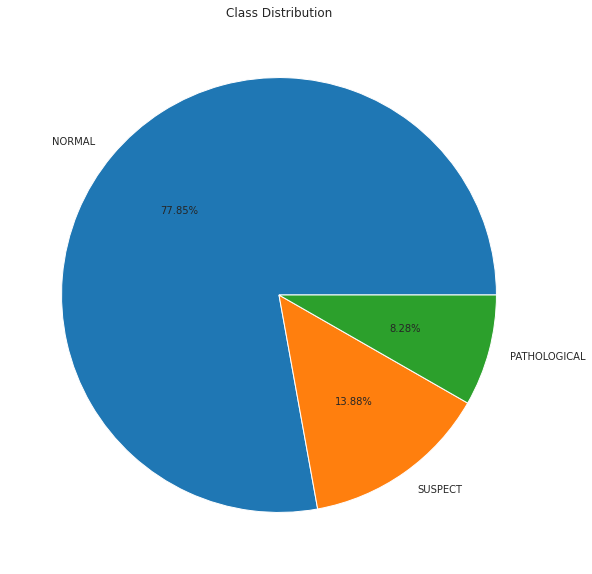

In [12]:
plt.figure(figsize=(10, 10))

plt.pie(
    eda_df['fetal_health'].value_counts(),
    autopct='%.2f%%',
    labels=["NORMAL", "SUSPECT", "PATHOLOGICAL"],
)

plt.title("Class Distribution")
plt.show()

# Data Preprocessing

In [13]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Rename target values (predicted classes)
    df['fetal_health'] = df['fetal_health'].replace({
        1.0: "NORMAL",
        2.0: "SUSPECT",
        3.0: "PATHOLOGICAL"
    })
    
    # Split df into X and y
    y = df['fetal_health']
    X = df.drop('fetal_health', axis=1)
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=1)
    
    # Scale X
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), index=X_train.index, columns=X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), index=X_test.index, columns=X_test.columns)
    
    return X_train, X_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = preprocess_inputs(data)

In [15]:
X_train

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_long_term_variability,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1178,-0.754973,0.731770,-0.204095,0.551513,-0.651135,-0.051917,-0.277438,-1.269308,0.073240,-0.537234,-0.324758,-0.595014,0.477137,-0.506937,-0.716047,-0.454252,-0.263063,0.035465,-0.208156,-0.340585,-0.525276
408,1.740547,-0.822284,-0.204095,-1.477290,-0.316227,-0.051917,-0.277438,1.688720,-1.297591,1.827866,-0.522608,-0.931081,1.023066,-0.338574,-1.061197,-0.454252,1.019938,1.198135,1.178619,-0.618965,1.096324
802,1.324627,-0.822284,-0.204095,0.551513,-0.651135,-0.051917,-0.277438,1.050714,-1.069119,1.277843,-0.126908,-1.060338,1.398392,-0.001848,-1.061197,-0.454252,0.775557,0.939764,0.901264,-0.618965,-0.525276
22,-0.547013,-0.822284,7.146148,-0.462889,0.353589,-0.051917,4.696388,-0.747303,1.329835,-0.537234,-0.738444,1.912562,-1.331252,1.962388,2.390302,0.936543,-3.806591,-2.289874,-2.496335,4.496267,-2.146877
204,-1.378853,-0.822284,-0.028041,-1.477290,-0.651135,-0.051917,-0.277438,0.238707,-0.726411,0.287801,-0.126908,-1.293000,0.545379,-1.909963,-1.061197,0.936543,-0.874016,-0.868833,-1.040221,-0.653763,-0.525276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,-0.027113,-0.822284,-0.204095,0.551513,2.363036,-0.051917,-0.277438,-1.559311,1.558307,-0.537234,1.869579,0.697551,-1.024167,-0.170211,1.009703,-0.454252,-0.079777,-0.675055,-0.277495,1.468885,1.096324
905,1.324627,-0.822284,-0.204095,0.889646,1.023405,-0.051917,-0.277438,-0.979305,-0.269468,-0.537234,-0.612540,-0.310650,0.204173,-0.338574,-0.370897,-0.454252,0.592271,0.552207,0.623909,-0.479775,1.096324
1096,-1.066913,3.580871,-0.204095,-0.801023,-0.651135,-0.051917,-0.277438,-1.327308,0.987127,-0.537234,-1.152131,-0.491609,0.238294,-0.675300,-1.061197,-0.454252,-0.079777,-0.093720,-0.208156,-0.479775,-0.525276
235,-1.274873,-0.045257,-0.072054,-1.477290,-0.651135,-0.051917,-0.277438,0.528709,-0.840647,-0.427229,0.430670,0.154673,-1.058287,-1.404874,-0.370897,-0.454252,-0.629635,-0.416684,-0.624189,-0.549370,1.096324


In [16]:
y_train

1178          NORMAL
408          SUSPECT
802          SUSPECT
22      PATHOLOGICAL
204           NORMAL
            ...     
960           NORMAL
905           NORMAL
1096          NORMAL
235           NORMAL
1061          NORMAL
Name: fetal_health, Length: 1488, dtype: object

# Training  with a variety of classification models

In [17]:
models = {
    "                   Logistic Regression": LogisticRegression(),
    "                   K-Nearest Neighbors": KNeighborsClassifier(),
    "                         Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine (Linear Kernel)": LinearSVC(),
    "   Support Vector Machine (RBF Kernel)": SVC(),
    "                        Neural Network": MLPClassifier(),
    "                         Random Forest": RandomForestClassifier(),
    "                     Gradient Boosting": GradientBoostingClassifier(),
    "                               XGBoost": XGBClassifier(eval_metric='mlogloss'),
    "                              LightGBM": LGBMClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    print(name + " trained.")

                   Logistic Regression trained.
                   K-Nearest Neighbors trained.
                         Decision Tree trained.
Support Vector Machine (Linear Kernel) trained.
   Support Vector Machine (RBF Kernel) trained.
                        Neural Network trained.
                         Random Forest trained.
                     Gradient Boosting trained.
                               XGBoost trained.
                              LightGBM trained.


# Results after training the model

In [18]:
for name, model in models.items():
    print(name + ": {:.2f}%".format(model.score(X_test, y_test) * 100))

                   Logistic Regression: 90.13%
                   K-Nearest Neighbors: 89.97%
                         Decision Tree: 91.38%
Support Vector Machine (Linear Kernel): 88.87%
   Support Vector Machine (RBF Kernel): 91.07%
                        Neural Network: 91.22%
                         Random Forest: 92.79%
                     Gradient Boosting: 94.98%
                               XGBoost: 94.83%
                              LightGBM: 94.83%


#model performance
Gradient boosting performed better than all others
Support Vector Machine (Linear Kernel) has low accuracy but it also gave a good results.
